In [1]:
import numpy as np
import json
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# dpi of images displayed in notebook:
mpl.rcParams['figure.dpi'] = 100
# Plot theme:
sns.set_theme(style='darkgrid')
palette = sns.color_palette()

# Effectiveness of Linearisation Approximation and Optimal Design

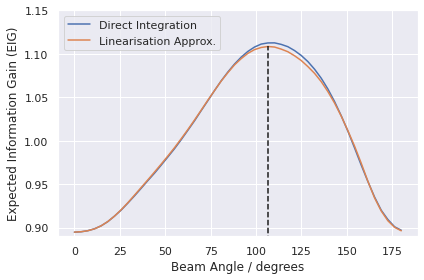

In [3]:
data_dir = '../chapter_5/data/ape/computed_ape.json'
with open(data_dir, 'r') as f:
    ape_vals = json.load(f)

d_vals = np.linspace(0,1,50)
fig, ax = plt.subplots()
for i, (key, ape_i) in enumerate(ape_vals.items()):
    if key in ('Surrogate APE', 'Local Linearisation'):
        if i == 0:
            key = 'Direct Integration'
        else:
            key = 'Linearisation Approx.'
        beam_angle = 180*np.array(d_vals).squeeze()
        eig = -1*np.array(ape_i).squeeze()
        sns.lineplot(x=beam_angle, y=eig, color=palette[i], label=key)
        if i == 1:
            opt_idx = np.argmax(eig)
            opt_d = 180*d_vals[opt_idx]
            opt_eig = eig[opt_idx]
            plt.vlines(opt_d, 0, opt_eig, colors='k', linestyles='dashed')
ax.set_ylim(0.89, 1.15)
ax.set_xlabel('Beam Angle / degrees')
ax.set_ylabel('Expected Information Gain (EIG)')
plt.tight_layout()
plt.savefig('opt_d.pdf')  
plt.show()

# Effect of Prior and Model - Nonlinear Beam

In [85]:
0.01*c1_range**2

0.25

In [71]:
data_dir = '../beam/data/neohookean_beam_training_data.json'
with open(data_dir, 'r') as f:
    beam_data = json.load(f)

c1_min = np.min(beam_data['C_1'])
c1_range = np.max(beam_data['C_1']) - c1_min

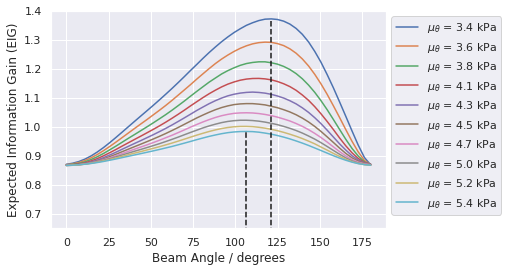

In [72]:
data_dir = '../chapter_5/data/noise_prior/ape_prior.json'
with open(data_dir, 'r') as f:
    prior_experiment = json.load(f)


cov_idx_to_plot = 5
plot_freq = 1
fig, ax = plt.subplots()
num_plotted = num_found = 0
cov_to_plot = np.unique(prior_experiment['cov'])[cov_idx_to_plot]
idx_plotted = []
for i, cov in enumerate(prior_experiment['cov']):
    if np.isclose(cov, cov_to_plot):
        if num_found % plot_freq == 0:
            ape_i = np.array(prior_experiment['ape'])[i,:]
            eig = -1*ape_i.squeeze()
            prior_mean = c1_range*prior_experiment['mean'][i] + c1_min
            beam_angle = 180*np.array(prior_experiment['d']).squeeze()
            sns.lineplot(x=beam_angle, y=eig, 
                         color=palette[num_plotted], label=f'$\mu_\\theta$ = {prior_mean:.1f} kPa')
            idx_plotted.append(i)
            num_plotted+=1
        num_found += 1
        
for i in (0, -1):
    idx = idx_plotted[i]
    ape_i = np.array(prior_experiment['ape'])[idx,:]
    eig = -1*ape_i.squeeze()
    opt_idx = np.argmax(eig.squeeze())
    opt_d = 180*np.array(prior_experiment['d'])[opt_idx]
    opt_eig = eig[opt_idx]
    plt.vlines(opt_d, 0, opt_eig, colors='k', linestyles='dashed')

ax.set_ylim(0.65, 1.4)
ax.set_xlabel('Beam Angle / degrees')
ax.set_ylabel('Expected Information Gain (EIG)')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('nonlin_prior_mean.svg', bbox_inches='tight')  
plt.show()

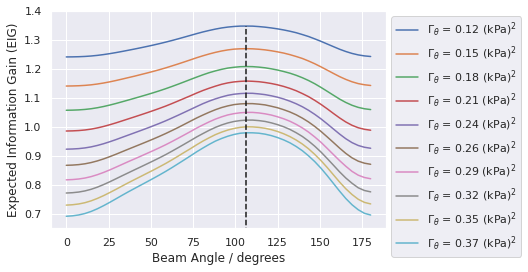

In [73]:
mean_idx_to_plot = 5
plot_freq = 1
fig, ax = plt.subplots()
num_plotted = num_found = 0
mean_to_plot = np.unique(prior_experiment['mean'])[mean_idx_to_plot]
idx_plotted = []
for i, mean in enumerate(prior_experiment['mean']):
    if np.isclose(mean, mean_to_plot):
        if num_found % plot_freq == 0:
            ape_i = np.array(prior_experiment['ape'])[i,:]
            beam_angle = 180*np.array(prior_experiment['d']).squeeze()
            eig = -1*ape_i
            prior_cov = (c1_range**2)*prior_experiment['cov'][i]
            sns.lineplot(x=beam_angle, y=eig.squeeze(), 
                         color=palette[num_plotted], label=f'$\Gamma_\\theta$ = {prior_cov:.2f} (kPa)$^2$')
            num_plotted += 1
            idx_plotted.append(i)
        num_found += 1
        
idx = idx_plotted[0]
ape_i = np.array(prior_experiment['ape'])[idx,:]
eig = -1*ape_i.squeeze()
opt_idx = np.argmax(eig.squeeze())
opt_d = 180*np.array(prior_experiment['d'])[opt_idx]
opt_eig = eig[opt_idx]
plt.vlines(opt_d, 0, opt_eig, colors='k', linestyles='dashed')

ax.set_xlabel('Beam Angle / degrees')
ax.set_ylabel('Expected Information Gain (EIG)')
ax.set_ylim(0.65, 1.4)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('nonlin_prior_cov.svg', bbox_inches='tight')  
plt.show()

# Effect of Prior and Model - Linear Beam

In [74]:
data_dir = '../beam/data/linear_beam_training_data.json'
with open(data_dir, 'r') as f:
    beam_data = json.load(f)

c1_min = np.min(beam_data['C_1'])
c1_range = np.max(beam_data['C_1']) - c1_min

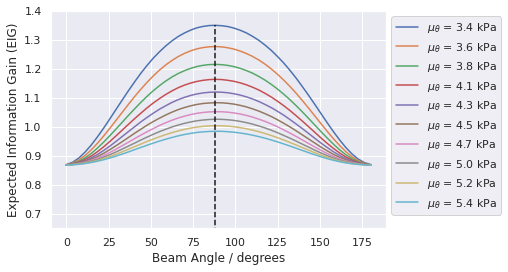

In [75]:
data_dir = '../chapter_5/data/linear_beam/ape_prior_linearbeam.json'
with open(data_dir, 'r') as f:
    prior_experiment = json.load(f)


cov_idx_to_plot = 5
plot_freq = 1
fig, ax = plt.subplots()
num_plotted = num_found = 0
cov_to_plot = np.unique(prior_experiment['cov'])[cov_idx_to_plot]
idx_plotted = []
for i, cov in enumerate(prior_experiment['cov']):
    if np.isclose(cov, cov_to_plot):
        if num_found % plot_freq == 0:
            ape_i = np.array(prior_experiment['ape'])[i,:]
            eig = -1*ape_i.squeeze()
            prior_mean = c1_range*prior_experiment['mean'][i] + c1_min
            beam_angle = 180*np.array(prior_experiment['d']).squeeze()
            sns.lineplot(x=beam_angle, y=eig, 
                         color=palette[num_plotted], label=f'$\mu_\\theta$ = {prior_mean:.1f} kPa')
            idx_plotted.append(i)
            num_plotted+=1
        num_found += 1

idx = idx_plotted[0]
ape_i = np.array(prior_experiment['ape'])[idx,:]
eig = -1*ape_i.squeeze()
opt_idx = np.argmax(eig.squeeze())
opt_d = 180*np.array(prior_experiment['d'])[opt_idx]
opt_eig = eig[opt_idx]
plt.vlines(opt_d, 0, opt_eig, colors='k', linestyles='dashed')
        
ax.set_ylim(0.65, 1.4)
ax.set_xlabel('Beam Angle / degrees')
ax.set_ylabel('Expected Information Gain (EIG)')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('lin_prior_mean.pdf', bbox_inches='tight')   
plt.show()

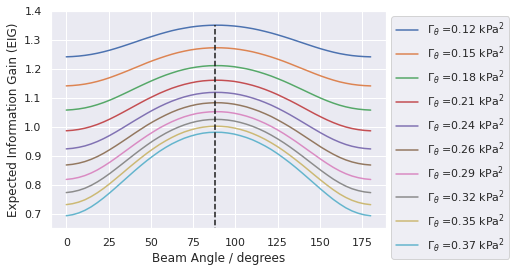

In [76]:
mean_idx_to_plot = 5
plot_freq = 1
fig, ax = plt.subplots()
num_plotted = num_found = 0
mean_to_plot = np.unique(prior_experiment['mean'])[mean_idx_to_plot]
idx_plotted = []
for i, mean in enumerate(prior_experiment['mean']):
    if np.isclose(mean, mean_to_plot):
        if num_found % plot_freq == 0:
            ape_i = np.array(prior_experiment['ape'])[i,:]
            beam_angle = 180*np.array(prior_experiment['d']).squeeze()
            eig = -1*ape_i
            prior_cov = (c1_range**2)*prior_experiment['cov'][i] 
            sns.lineplot(x=beam_angle, y=eig.squeeze(), 
                         color=palette[num_plotted], label='$\Gamma_\\theta$ =' + f'{prior_cov:.2f} kPa$^2$')
            num_plotted += 1
            idx_plotted.append(i)
        num_found += 1
        
idx = idx_plotted[0]
ape_i = np.array(prior_experiment['ape'])[idx,:]
eig = -1*ape_i.squeeze()
opt_idx = np.argmax(eig.squeeze())
opt_d = 180*np.array(prior_experiment['d'])[opt_idx]
opt_eig = eig[opt_idx]
plt.vlines(opt_d, 0, opt_eig, colors='k', linestyles='dashed')        

ax.set_xlabel('Beam Angle / degrees')
ax.set_ylabel('Expected Information Gain (EIG)')
ax.set_ylim(0.65, 1.4)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('lin_prior_cov.pdf', bbox_inches='tight') 
plt.show()